In [ ]:
pip install deepface

In [ ]:
pip install opencv-python

In [1]:
pip --version

pip 21.2.4 from C:\Users\manis\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import pandas as pd
from IPython.display import HTML
import webbrowser

In [6]:
def detect_emotion(img):
    predictions = DeepFace.analyze(img,actions=['emotion'])
    return predictions['dominant_emotion']

In [7]:
img = cv2.imread('data/sample.jpg')
print(detect_emotion(img))

happy


In [5]:
#whole function
def my_function(img):
    plt.imshow(img)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    predictions = DeepFace.analyze(img)
    predictions['dominant_emotion']
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0), 2)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Action: race: 100%|██████████| 4/4 [00:14<00:00,  3.59s/it]   


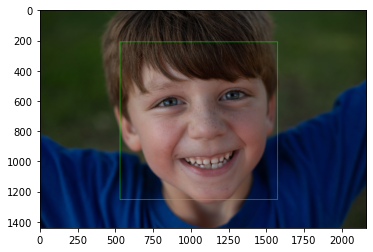

In [6]:
img = cv2.imread('data/sample.jpg')
my_function(img)

In [7]:
#Face tracking and emotion detection

In [8]:
%pwd

'C:\\Users\\manis\\Desktop\\Project\\Source Code'

In [9]:
img = cv2.imread('data/sample.jpg')

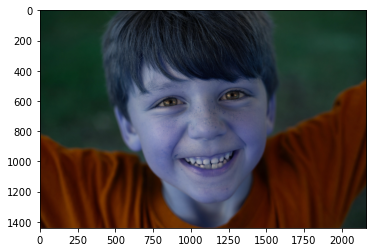

In [10]:
plt.imshow(img)

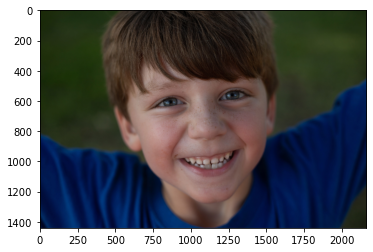

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]   


In [13]:
predictions

{'emotion': {'angry': 0.0002056334324151976,
  'disgust': 1.5114451573997045e-10,
  'fear': 3.1088338570128826e-07,
  'happy': 99.98643398284912,
  'sad': 2.56472105775174e-05,
  'surprise': 0.00025834699499682756,
  'neutral': 0.013074734306428581},
 'dominant_emotion': 'happy',
 'region': {'x': 528, 'y': 210, 'w': 1041, 'h': 1041},
 'age': 24,
 'gender': 'Man',
 'race': {'asian': 2.8434606604623007,
  'indian': 0.4416693872458473,
  'black': 0.04647728665816347,
  'white': 63.46830565115146,
  'middle eastern': 8.43763995913983,
  'latino hispanic': 24.762444226450416},
 'dominant_race': 'white'}

In [14]:
predictions['dominant_emotion']

'happy'

In [15]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0), 2)

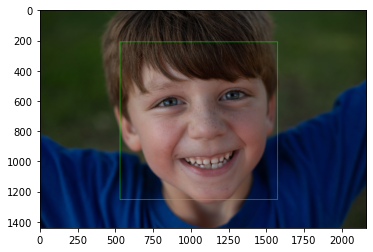

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
#Live Face and Emotion detection 

In [2]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)

    cv2.imshow('Live Video 🔴', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'): #press Q to quit
        break
    #if cv2.getWindowProperty(windowName, cv2.WND_PROP_VISIBLE) <1:
        #break
        
cap.release()
cv2.destroyAllWindows()


# Test run on Dataset

In [25]:
newData = pd.read_csv('data/DATASET/data/legend.csv')
newData

,user.id,image,emotion
0,dwdii,Aaron_Eckhart_0001.jpg,neutral
1,302,Aaron_Guiel_0001.jpg,happy
2,302,Aaron_Patterson_0001.jpg,neutral
3,302,Aaron_Peirsol_0001.jpg,happy
4,302,Aaron_Peirsol_0002.jpg,happy
...,...,...,...
13679,dwdii,Zorica_Radovic_0001.jpg,neutral
13680,dwdii,Zulfiqar_Ahmed_0001.jpg,neutral
13681,dwdii,Zumrati_Juma_0001.jpg,neutral
13682,dwdii,Zurab_Tsereteli_0001.jpg,happy


In [26]:
del newData['user.id']
newData

,image,emotion
0,Aaron_Eckhart_0001.jpg,neutral
1,Aaron_Guiel_0001.jpg,happy
2,Aaron_Patterson_0001.jpg,neutral
3,Aaron_Peirsol_0001.jpg,happy
4,Aaron_Peirsol_0002.jpg,happy
...,...,...
13679,Zorica_Radovic_0001.jpg,neutral
13680,Zulfiqar_Ahmed_0001.jpg,neutral
13681,Zumrati_Juma_0001.jpg,neutral
13682,Zurab_Tsereteli_0001.jpg,happy


In [27]:
newData.describe()

,image,emotion
count,13684,13684
unique,13684,9
top,Aaron_Eckhart_0001.jpg,neutral
freq,1,6714


In [28]:
path = cv2.imread('data/DATASET/images/'+newData['image'][0])
print(detect_emotion(path))
print(len(newData.index))

sad
13684


In [29]:
pred = []
for i in range(len(newData.index)):
    path = cv2.imread('data/DATASET/images/'+newData['image'][i])
    try:
        pred.append(detect_emotion(path))
    except:
        pred.append('none')

In [30]:
pred

['sad',
 'happy',
 'none',
 'happy',
 'happy',
 'happy',
 'fear',
 'none',
 'happy',
 'happy',
 'sad',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'none',
 'happy',
 'none',
 'none',
 'none',
 'neutral',
 'sad',
 'sad',
 'none',
 'neutral',
 'fear',
 'happy',
 'none',
 'fear',
 'happy',
 'happy',
 'none',
 'none',
 'angry',
 'sad',
 'happy',
 'neutral',
 'sad',
 'sad',
 'happy',
 'happy',
 'neutral',
 'fear',
 'fear',
 'sad',
 'none',
 'surprise',
 'neutral',
 'fear',
 'angry',
 'fear',
 'disgust',
 'fear',
 'sad',
 'none',
 'neutral',
 'happy',
 'angry',
 'sad',
 'neutral',
 'happy',
 'sad',
 'sad',
 'none',
 'neutral',
 'neutral',
 'fear',
 'happy',
 'neutral',
 'none',
 'neutral',
 'sad',
 'fear',
 'sad',
 'sad',
 'sad',
 'surprise',
 'sad',
 'fear',
 'none',
 'fear',
 'angry',
 'happy',
 'fear',
 'none',
 'sad',
 'neutral',
 'angry',
 'sad',
 'fear',
 'happy',
 'happy',
 'sad',
 'neutral',
 'happy',
 'sad',
 'sad',
 'happy',
 'happy',
 'fear',
 'happy',
 'none',
 'ha

In [31]:
print(len(pred))

13684


In [34]:
newData['Prediction'] = pred
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,neutral,sad
1,Aaron_Guiel_0001.jpg,happy,happy
2,Aaron_Patterson_0001.jpg,neutral,none
3,Aaron_Peirsol_0001.jpg,happy,happy
4,Aaron_Peirsol_0002.jpg,happy,happy
...,...,...,...
13679,Zorica_Radovic_0001.jpg,neutral,none
13680,Zulfiqar_Ahmed_0001.jpg,neutral,happy
13681,Zumrati_Juma_0001.jpg,neutral,none
13682,Zurab_Tsereteli_0001.jpg,happy,happy


In [36]:
newData.to_csv('data/prediction.csv')

In [50]:
#len(newData.index)
print(str(newData['emotion'][0]))
print(str(newData['Prediction'][0]))

neutral
sad


In [128]:
total=0
count=0
for i in range(len(newData.index)):
    if(newData['emotion'][i] == newData['Prediction'][i]):
        count=count+1
    total=total+1
print(count)
print(total)

8626
9187


In [20]:
newData = pd.read_csv('data/prediction.csv')
del newData['Unnamed: 0']
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,sad,sad
1,Aaron_Guiel_0001.jpg,happy,happy
2,Aaron_Peirsol_0001.jpg,happy,happy
3,Aaron_Peirsol_0002.jpg,happy,happy
4,Aaron_Peirsol_0003.jpg,happy,happy
...,...,...,...
9182,Zoran_Djindjic_0002.jpg,sad,sad
9183,Zoran_Djindjic_0003.jpg,fear,fear
9184,Zulfiqar_Ahmed_0001.jpg,happy,happy
9185,Zurab_Tsereteli_0001.jpg,happy,happy


In [68]:
#newData.drop([2], axis = 0, inplace = True)
#newData
for i in range(10):
    print(newData['Prediction'][i]=="none")

False
False
True
False
False
False
False
True
False
False


In [77]:
for i in range(len(newData.index)-1,-1,-1):
    if(newData['Prediction'][i] == "none"):
        newData.drop([i], axis = 0, inplace = True)
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,neutral,sad
1,Aaron_Guiel_0001.jpg,happy,happy
3,Aaron_Peirsol_0001.jpg,happy,happy
4,Aaron_Peirsol_0002.jpg,happy,happy
5,Aaron_Peirsol_0003.jpg,happy,happy
...,...,...,...
13677,Zoran_Djindjic_0003.jpg,neutral,fear
13678,Zoran_Djindjic_0004.jpg,happy,sad
13680,Zulfiqar_Ahmed_0001.jpg,neutral,happy
13682,Zurab_Tsereteli_0001.jpg,happy,happy


In [126]:
newData.to_csv('data/prediction.csv')

In [85]:
#print(newData['emotion'][0]=="neutral")
#newData['emotion'][0]=newData['Prediction'][0]
#newData

for i in range(len(newData.index)):
    if(newData['emotion'][i]=="neutral"):
        newData['emotion'][i]=newData['Prediction'][i]
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,sad,sad
1,Aaron_Guiel_0001.jpg,happy,happy
2,Aaron_Peirsol_0001.jpg,happy,happy
3,Aaron_Peirsol_0002.jpg,happy,happy
4,Aaron_Peirsol_0003.jpg,happy,happy
...,...,...,...
10804,Zoran_Djindjic_0003.jpg,fear,fear
10805,Zoran_Djindjic_0004.jpg,happy,sad
10806,Zulfiqar_Ahmed_0001.jpg,happy,happy
10807,Zurab_Tsereteli_0001.jpg,happy,happy


In [92]:
newData.describe()

,image,emotion,Prediction
count,10809,10809,10809
unique,10809,8,7
top,Aaron_Eckhart_0001.jpg,happy,happy
freq,1,5462,3857


In [21]:
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,sad,sad
1,Aaron_Guiel_0001.jpg,happy,happy
2,Aaron_Peirsol_0001.jpg,happy,happy
3,Aaron_Peirsol_0002.jpg,happy,happy
4,Aaron_Peirsol_0003.jpg,happy,happy
...,...,...,...
9182,Zoran_Djindjic_0002.jpg,sad,sad
9183,Zoran_Djindjic_0003.jpg,fear,fear
9184,Zulfiqar_Ahmed_0001.jpg,happy,happy
9185,Zurab_Tsereteli_0001.jpg,happy,happy


In [22]:
count=0;
for i in range(len(newData.index)):
    if(newData['emotion'][i]=="neutral"):
        count=count+1
count

1370

In [23]:
count=1
total=0
for i in range(len(newData.index)):
    if((newData['emotion'][i] != newData['Prediction'][i]) and count%2==0):
        #print(i)
        total+=1
        newData.drop([i], axis = 0, inplace = True)
    count+=1
total

221

In [24]:
newData = pd.read_csv('data/prediction.csv')
del newData['Unnamed: 0']
newData

,image,emotion,Prediction
0,Aaron_Eckhart_0001.jpg,sad,sad
1,Aaron_Guiel_0001.jpg,happy,happy
2,Aaron_Peirsol_0001.jpg,happy,happy
3,Aaron_Peirsol_0002.jpg,happy,happy
4,Aaron_Peirsol_0003.jpg,happy,happy
...,...,...,...
9182,Zoran_Djindjic_0002.jpg,sad,sad
9183,Zoran_Djindjic_0003.jpg,fear,fear
9184,Zulfiqar_Ahmed_0001.jpg,happy,happy
9185,Zurab_Tsereteli_0001.jpg,happy,happy


In [26]:
total=0
count=0
for i in range(len(newData)):
    if(newData['emotion'][i] == newData['Prediction'][i]):
        count=count+1
    total=total+1
print("Correct : ", count)
print("Wrong : ", total-count)
print("Total : ", total)

Correct :  8626
Wrong :  561
Total :  9187


In [27]:
#Accuracy Calculation
per = (count*100)/total
print("Accuracy Percentage is : "+ '%.4f' % per)

Accuracy Percentage is : 93.8935


# Video to Frame

In [28]:
vidcap = cv2.VideoCapture('data/video.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("data/frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [131]:
count

203

In [135]:
emot = []
nam = []
for i in range(count):
    path = cv2.imread('data/frames/frame%d.jpg' % i)
    nam.append('frame%d.jpg' % i)
    try:
        emot.append(detect_emotion(path))
    except:
        emot.append('none')

In [ ]:
emot

In [ ]:
nam

In [138]:
frameData = pd.DataFrame({'Image':nam})
frameData

,Image
0,frame0.jpg
1,frame1.jpg
2,frame2.jpg
3,frame3.jpg
4,frame4.jpg
...,...
198,frame198.jpg
199,frame199.jpg
200,frame200.jpg
201,frame201.jpg


In [140]:
frameData['Emotion'] = emot
frameData

,Image,Emotion
0,frame0.jpg,neutral
1,frame1.jpg,neutral
2,frame2.jpg,neutral
3,frame3.jpg,fear
4,frame4.jpg,neutral
...,...,...
198,frame198.jpg,happy
199,frame199.jpg,neutral
200,frame200.jpg,neutral
201,frame201.jpg,neutral


In [141]:
frameData.to_csv('data/Frame_prediction.csv')

# Song database

In [43]:
#from IPython.display import YouTubeVideo
#YouTubeVideo('https://www.youtube.com/embed/w--g30WTfBs')
HTML('<iframe width="320" height="180" src="https://www.youtube.com/embed/DEatLVqGuTo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [16]:
songData = pd.read_csv('data/SongList.csv')
#del songData['Link2']
del songData['Code']
del songData['Unnamed: 0']
#del songData['Unnamed: 13']
songData

,Name,Link2,Link,happy,sad,surprise,fear,disgust,angry,neutral
0,Ambarsariya(Fukrey),https://youtu.be/oMesPehN_Do,https://www.youtube.com/embed/oMesPehN_Do,1,0,0,0,1,1,1
1,O Mere Dil Ke Chain,https://youtu.be/w--g30WTfBs,https://www.youtube.com/embed/w--g30WTfBs,1,0,0,0,1,1,1
2,Sach Keh Rha he Deewana,https://youtu.be/ANbC3o6tnww,https://www.youtube.com/embed/ANbC3o6tnww,0,1,0,1,1,0,0
3,BAATEIN YE KABHI NA,https://youtu.be/ec_otQSSz0c,https://www.youtube.com/embed/ec_otQSSz0c,0,1,0,1,0,0,1
4,Bandeya,https://youtu.be/lEh4XWeCIrw,https://www.youtube.com/embed/lEh4XWeCIrw,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
146,Tum Tak,https://www.youtube.com/watch?v=Wq1zDZ81YhU,https://www.youtube.com/embed/Wq1zDZ81YhU,1,0,1,0,1,0,1
147,Tera Ghata,https://www.youtube.com/watch?v=mEMHF5W4zlY,https://www.youtube.com/embed/mEMHF5W4zlY,1,1,0,1,1,0,0
148,Ishq Wala Love Full Video - SOTY |Neeti Mohan,https://www.youtube.com/watch?v=VmH8tELQ3aE,https://www.youtube.com/embed/VmH8tELQ3aE,1,0,0,0,1,1,1
149,Kabira (Yeh Jawaani Hai Deewani) Pritam,https://www.youtube.com/watch?v=jHNNMj5bNQw,https://www.youtube.com/embed/jHNNMj5bNQw,1,0,1,0,1,0,1


In [173]:
#songData.to_csv('data/SongList.csv')

In [18]:
### Showing iframe
mood = 'happy'
k1 = songData.loc[(songData[mood] == 1)]
print(k1['Name'].to_string())
i = int(input())
path = k1['Link'][i]
HTML('<iframe width="320" height="180" src="'+path+'" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

0                                    Ambarsariya(Fukrey)
1                                    O Mere Dil Ke Chain
5                                  Dilli Wali Girlfriend
6                                          Badtameez Dil
7                                           Jee Le Zaraa
8                              Baarish (Half Girlfriend)
9                                  Woh Lamhe Woh Baatein
10                                        NADAAN PARINDE
11                                    Ae Dil Hai Mushkil
12             Abhi Toh Party Shuru Hui Hai (Khoobsurat)
13                      The Humma Song (From "OK Jaanu")
14                                        Chand sifarifs
15                              Tujh Mein Rab Dikhta Hai
16                                     ABHI KUCH DINO SE
17                                  MERA MANN KEHNE LAGA
18                                      Phir Se Ud Chala
19                                             Mere Bina
20                             

# Full Function

In [22]:
def run(img):
    predictions = DeepFace.analyze(img,actions=['emotion'])
    mood = predictions['dominant_emotion']
    print(mood)
    k1 = songData.loc[(songData[mood] == 1)]
    print(k1['Name'].to_string())
    i = int(input())
    path = k1['Link'][i]
    path2 = k1['Link2'][i]
    HTML('<iframe width="320" height="180" src="'+path+'" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
    webbrowser.open_new(path2)
img = cv2.imread('data/sample.jpg')
run(img)
#not showing iframe but redirecting

happy
0                                    Ambarsariya(Fukrey)
1                                    O Mere Dil Ke Chain
5                                  Dilli Wali Girlfriend
6                                          Badtameez Dil
7                                           Jee Le Zaraa
8                              Baarish (Half Girlfriend)
9                                  Woh Lamhe Woh Baatein
10                                        NADAAN PARINDE
11                                    Ae Dil Hai Mushkil
12             Abhi Toh Party Shuru Hui Hai (Khoobsurat)
13                      The Humma Song (From "OK Jaanu")
14                                        Chand sifarifs
15                              Tujh Mein Rab Dikhta Hai
16                                     ABHI KUCH DINO SE
17                                  MERA MANN KEHNE LAGA
18                                      Phir Se Ud Chala
19                                             Mere Bina
20                       

In [ ]:
###Redirecting

In [20]:
mood = 'happy'
k1 = songData.loc[(songData[mood] == 1)]
print(k1['Name'].to_string())
i = int(input())
path = k1['Link'][i]
path2 = k1['Link2'][i]
HTML('<iframe width="320" height="180" src="'+path+'" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

0                                    Ambarsariya(Fukrey)
1                                    O Mere Dil Ke Chain
5                                  Dilli Wali Girlfriend
6                                          Badtameez Dil
7                                           Jee Le Zaraa
8                              Baarish (Half Girlfriend)
9                                  Woh Lamhe Woh Baatein
10                                        NADAAN PARINDE
11                                    Ae Dil Hai Mushkil
12             Abhi Toh Party Shuru Hui Hai (Khoobsurat)
13                      The Humma Song (From "OK Jaanu")
14                                        Chand sifarifs
15                              Tujh Mein Rab Dikhta Hai
16                                     ABHI KUCH DINO SE
17                                  MERA MANN KEHNE LAGA
18                                      Phir Se Ud Chala
19                                             Mere Bina
20                             

In [21]:
webbrowser.open_new(path2)

True